In [3]:
import numpy
import numpy as np
import torch
import torch.nn as nn 
import torch.optim as optim
import random
import pandas as pd
import matplotlib.pyplot as plt
import pandas

In [36]:
#data_generator
matrix_T = torch.tensor([[0, 1], [1, 0]], dtype=torch.float64)
matrix_U = torch.tensor([[1, 0], [-1, 1]], dtype=torch.float64)

inverse_T = torch.inverse(matrix_T)
inverse_U = torch.inverse(matrix_U)

max_moves = 30  #how many inverse operations on the final destination
goal_position = torch.tensor([[1], [0]], dtype=torch.float64)


def data_generator(num_of_datapoints):
    data = torch.empty((num_of_datapoints, 3), dtype=torch.float64)
    for i in range(num_of_datapoints):
        start = goal_position
        moves = random.randint(1, max_moves)
        coin = 3
        for q in range(moves):
            coin = random.randint(0, 1)
            if coin == 1:
                #  print(start, inverse_U, "=")
                start = torch.matmul(inverse_U, start)
            #  print(start)
            else:
                #  print(start, inverse_T, "=")
                start = torch.matmul(inverse_T, start)
                if q != moves - 1:
                    start = torch.matmul(inverse_U, start)
            # print(start)
        # print("done")
        data[i, 0] = start[0]
        data[i, 1] = start[1]
        data[i, 2] = coin
    return data

#https://stackoverflow.com/questions/36158058/torch-save-tensor-to-csv-file#:~:text=For%20simple%20tables%2C%20you%20can,then%20to%20a%20Pandas%20dataframe.&text=You%20can%20first%20convert%20the,table%20as%20a%20csv%20file.
data = data_generator(20000)
data_table = data.numpy()
df = pandas.DataFrame(data_table)
df.to_csv("generated_pairs.csv", index = False) 


In [6]:
#https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/
#https://stackoverflow.com/questions/12336234/read-csv-file-to-numpy-array-first-row-as-strings-rest-as-float
#https://www.w3schools.com/python/numpy/numpy_array_join.asp#:~:text=Joining%20Arrays%20Using%20Stack%20Functions&text=We%20can%20concatenate%20two%201,it%20is%20taken%20as%200.

#make tensors from csv file

#from cs544 notes 
data = pd.read_csv("generated_pairs.csv", names=["0","1","2"], delimiter=",")
dataset = torch.utils.data.TensorDataset(
    torch.tensor(data.loc[:, "0":"1"].values), # input 
    torch.tensor(data.loc[:, ["2"]].values) #output 
)
X, Y = dataset[:] #label input and output 


In [7]:
#https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/
#making the model 
model = nn.Sequential(
    nn.Linear(2, 128), #first layer 128
    nn.ReLU(),
    nn.Linear(128,64), #second layer 64
    nn.ReLU(),
    nn.Linear(64, 16), #third layer 16
    nn.ReLU(),
    nn.Linear(16,1), #singular output 
    nn.Sigmoid()
)
#print(model)

In [8]:
#https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/
#prep for training 
#https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/
#prep for training 
loss_function = nn.BCELoss() #should this be our loss function too? 
optimizer = optim.Adam(model.parameters(), lr = 0.001) #chose Adam and lr from site 

#split training and testing data 
train, test = torch.utils.data.random_split(dataset, [0.75, 0.25]) #from cs544 class notes 
X_train, Y_train = train[:]
X_train = torch.Tensor.numpy(X_train)
Y_train = torch.Tensor.numpy(Y_train)


In [9]:
batch_s = 100 #batch size 
epoch_s = int(20000*0.75) #epoch size 
dl = torch.utils.data.DataLoader(train, batch_size = batch_s, shuffle = True) #from cs544 notes 
dl_test = torch.utils.data.DataLoader(test, batch_size = batch_s, shuffle = False)

In [48]:
# we can use a smaller number of epochs without changing results
epoch_s = 200

# I have no idea why but we need to change dtype to float32
matrix_T = torch.tensor([[0, 1], [1, 0]], dtype=torch.float32)
matrix_U = torch.tensor([[1, 0], [-1, 1]], dtype=torch.float32)

inverse_T = torch.inverse(matrix_T)
inverse_U = torch.inverse(matrix_U)

print(inverse_U)

tensor([[1., 0.],
        [1., 1.]])


In [38]:
#https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/
for epoch in range(epoch_s):
    total_loss = 0.0
    for i in range(0, len(X_train), batch_s):
        optimizer.zero_grad()
        X_batch = X_train[i:i+batch_s]
        # print(X_batch)
        y_pred = model(torch.Tensor(X_batch))
        Y_batch = Y_train[i:i+batch_s]
        # print(Y_batch)
        loss = loss_function(y_pred, torch.Tensor(Y_batch))
        
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    print(f'Finished epoch {epoch}, latest loss {total_loss / len(dl)}')

Finished epoch 0, latest loss 0.0008824534593660074
Finished epoch 1, latest loss 0.0008852797333845588
Finished epoch 2, latest loss 0.0008883694512094179
Finished epoch 3, latest loss 0.0008911306728997298
Finished epoch 4, latest loss 0.0008935469115012822
Finished epoch 5, latest loss 0.0008957120193649312
Finished epoch 6, latest loss 0.0008977172664350152
Finished epoch 7, latest loss 0.0008996262432875648
Finished epoch 8, latest loss 0.0009014788218609608
Finished epoch 9, latest loss 0.0009032950348806216
Finished epoch 10, latest loss 0.0009050821146370045
Finished epoch 11, latest loss 0.0009068395410874926
Finished epoch 12, latest loss 0.0009085625075015553
Finished epoch 13, latest loss 0.0009102435186059162
Finished epoch 14, latest loss 0.0009118722720798128
Finished epoch 15, latest loss 0.0009134408486708479
Finished epoch 16, latest loss 0.0009149402878370558
Finished epoch 17, latest loss 0.0009163615948112391
Finished epoch 18, latest loss 0.0009176980206870575
Fin

In [76]:
def euclidean_algorithm(pair): 
    a = pair[0,0]
    b = pair[0,1]
    plt.plot(a.detach(), b.detach(), "ro", markersize = 3)
    index = 1
    old_matrix = matrix_U

    
    while index < 500: 
        
        index += 1
        print(index)
        if a==0 or b==0: 
            return
        pred = model(torch.tensor([[a,b]]))
        if abs(1-pred) < abs(pred): # if prediciton is closer to 1 
            pair = pair @ matrix_U
            old_matrix = matrix_U
        else: 
            # if we ever hit 'pair' with matrix_T twice, then we've hit a loop, so break
            if bool(torch.all(old_matrix == matrix_T)):
                return
            pair = pair @ matrix_T
            old_matrix = matrix_T
        print(pair)
        a = pair[0,0]
        b = pair[0,1]
        plt.plot(a.detach(), b.detach(), "ro", markersize = 3+index) #from cs544 notes 

In [71]:
old_matrix = matrix_T

2
tensor([[3., 4.]])
3
tensor([[4., 3.]])
4
None


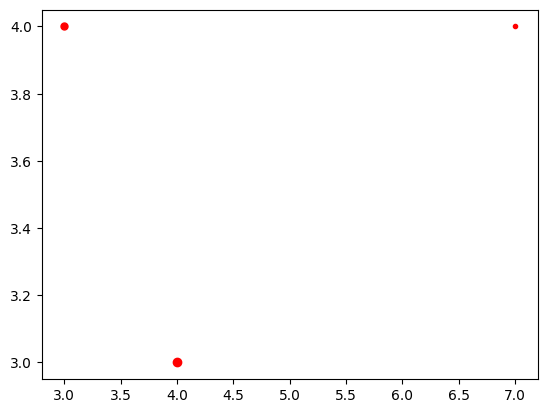

In [78]:
pair = torch.tensor([[7,4]], dtype=torch.float32)
print(euclidean_algorithm(pair))

In [64]:
model(torch.tensor([[70,4]], dtype=torch.float32))

tensor([[1.]], grad_fn=<SigmoidBackward0>)